In [3]:
import warnings
warnings.filterwarnings('ignore')
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time

In [1]:
#本次验证的假设：选取10日KDJ均值进行判断，10日均D由下向上穿过K时卖出，10日均D由上向下穿过K时买入

In [40]:
#选取BTCUSDT：binance为数据对象，并添加freq参数
start = time()
path = r'C:\Users\风袖\Downloads\min_data\VnTrader_1Min_Db'
props = {'fields':'high,low,close,open,volume',
         'symbol': 'BTCUSDT:binance',
         'freq':'30min,1h',
         'start_date': 20180601000000}

Time_dict = ds.bar_reader(path, props)#读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()
dv1h.create_init_dv(Time_dict['1h'].dropna().set_index(["trade_date","symbol"]))
dv1h.get_ts('close',date_type='datetime').head()
import pandas as pd
import matplotlib.pyplot as plt

Initialize dataview success.


In [87]:
#以10日均KDJ为对象
def Plot_Mean(dv, KDJ_K_A, KDJ_D_A, KDJ_J_A, chart_name='KDJ',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(KDJ_K_A.iloc[n:], alpha=0.4,c='blue')
    ax1.plot(KDJ_D_A.iloc[n:], alpha=0.4,c='orange')
    ax1.plot(KDJ_J_A.iloc[n:], alpha=0.4,c='green')
    ax1.hlines(0.5, RSV.iloc[n:].index[0], RSV.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    # plt.savefig(chart_name)
    plt.show()

def SMA(A,n,m):
        # 设置alpha的比例
        alpha = m/n
        #通过ewm计算递归函数
        return A.ewm(alpha=alpha, adjust=False).mean()
dv1h.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1h.add_formula('KDJ_K_A',"Ts_Mean(SMA(RSV,{},{}),10)".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_D_A',"Ts_Mean(SMA(KDJ_K_A,{},{}),10)".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_J_A',"Ts_Mean({}*KDJ_K_A - {}*KDJ_D_A,10)".format(3,2), add_data=True)

Field [RSV] is overwritten.
Field [KDJ_K_A] is overwritten.
Field [KDJ_D_A] is overwritten.
Field [KDJ_J_A] is overwritten.


symbol,BTCUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


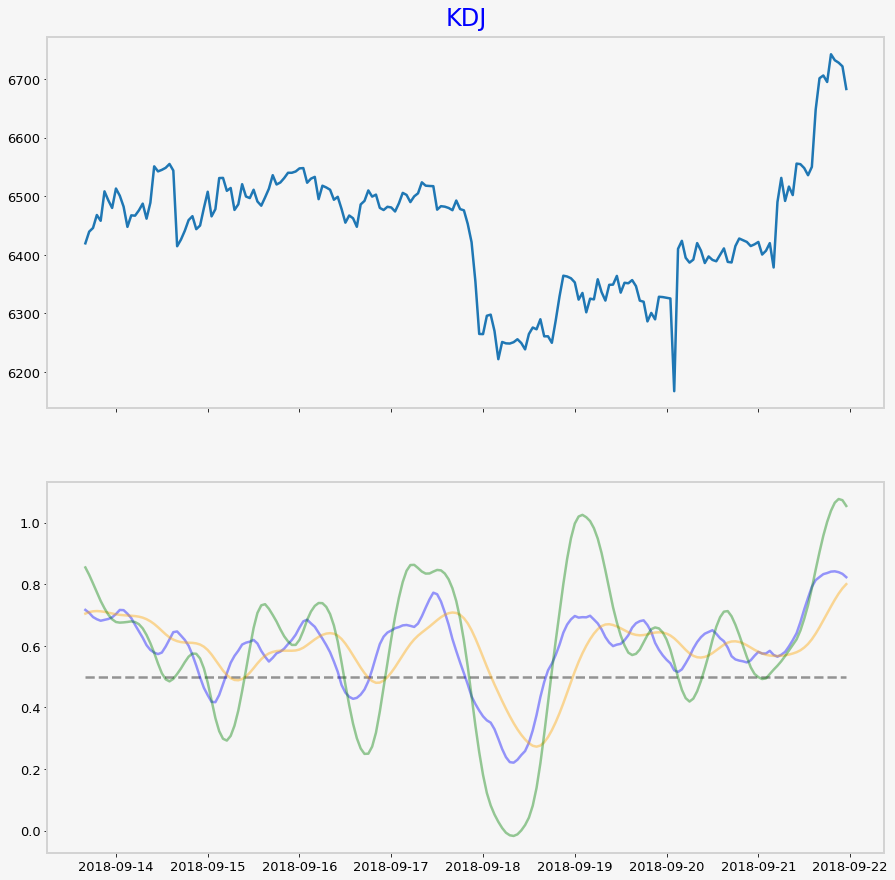

In [88]:
KDJ_K_A = dv1h.get_ts('KDJ_K_A', date_type='datetime')
KDJ_D_A = dv1h.get_ts('KDJ_D_A', date_type='datetime')
KDJ_J_A = dv1h.get_ts('KDJ_J_A', date_type='datetime')
close = dv1h.get_ts('close',date_type='datetime')
RSV = dv1h.get_ts('RSV', date_type='datetime')

Plot_Mean(dv1h, KDJ_K_A.iloc[:,0], KDJ_D_A.iloc[:,0], KDJ_J_A.iloc[:,0],n=-200)

In [89]:
#进出场假设：

#由图像看出，KDJ指标与价格存在一定的相关性，10日均D由下向上穿过K时卖出，10日均D由上向下穿过K时买入

#10日均KDJ形成死叉，卖出信号

#10日均KDJ形成金叉，买入信号

In [90]:
# 进场信号
long = dv1h.add_formula("longKDJ","If(KDJ_K_A>KDJ_D_A && (Delay(KDJ_K_A<KDJ_D_A,1)),2,0)", add_data=True)
short = dv1h.add_formula("shortKDJ","If(KDJ_K_A<KDJ_D_A && (Delay(KDJ_K_A>KDJ_D_A,1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLongKDJ","If(shortKDJ==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShortKDJ","If(longKDJ==2,-1,0)", add_data=True)

Field [longKDJ] is overwritten.
Field [shortKDJ] is overwritten.
Field [closeLongKDJ] is overwritten.
Field [closeShortKDJ] is overwritten.


In [91]:
#计算绩效
from jaqs_fxdayu.research import TimingDigger
Statistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='Statistic')

def TimingSignal(td, dv, mhp=None,sl=None,sp=None):
    td.process_signal(
        enter_signal=dv.get_ts("longKDJ"),
        exit_signal=dv.get_ts("closeLongKDJ"),
        sig_type="long",  # 信号类型 long
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts("shortKDJ"),
        exit_signal=dv.get_ts("closeShortKDJ"),
        sig_type="short",  # 信号类型 short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
TimingSignal(Statistic, dv1h, 100, 0.15, 0.7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%


In [92]:
Statistic.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat               7.956   -9.878   -0.094
p-value              0.000    0.000    0.925
mean                 0.017   -0.013   -0.000
std                  0.020    0.014    0.022
info_ratio           0.839   -0.909   -0.006
skewness             2.820   -2.575    0.917
kurtosis            11.243    8.940    7.133
pct5                 0.001   -0.041   -0.034
pct25                0.004   -0.015   -0.010
pct50                0.010   -0.009   -0.002
pct75                0.022   -0.004    0.007
pct95                0.045   -0.000    0.040
occurance           91.000  119.000  210.000
win_ratio              NaN      NaN    0.433
win_mean/loss_mean     NaN      NaN    1.282


In [93]:
Statistic.create_event_report(sig_type='long')

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               5.914  -7.061   -0.278
p-value              0.000   0.000    0.781
mean                 0.016  -0.012   -0.001
std                  0.017   0.014    0.021
info_ratio           0.902  -0.912   -0.027
skewness             2.098  -1.934    0.600
kurtosis             5.091   3.789    3.704
pct5                 0.001  -0.041   -0.034
pct25                0.004  -0.016   -0.009
pct50                0.010  -0.007   -0.002
pct75                0.022  -0.004    0.007
pct95                0.052  -0.000    0.034
occurance           44.000  61.000  105.000
win_ratio              NaN     NaN    0.419
win_mean/loss_mean     NaN     NaN    1.277


In [94]:
Statistic.create_event_report(sig_type='short')

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               5.427  -6.875    0.118
p-value              0.000   0.000    0.906
mean                 0.017  -0.014    0.000
std                  0.022   0.015    0.024
info_ratio           0.800  -0.911    0.012
skewness             3.082  -3.061    1.100
kurtosis            12.643  12.295    8.729
pct5                 0.002  -0.040   -0.028
pct25                0.003  -0.015   -0.010
pct50                0.010  -0.010   -0.002
pct75                0.020  -0.005    0.007
pct95                0.042  -0.001    0.040
occurance           47.000  58.000  105.000
win_ratio              NaN     NaN    0.448
win_mean/loss_mean     NaN     NaN    1.279


In [95]:
#short,long以及long_short的胜率分别为0.448，0.419，0.433，均大于0.4；
#win_mean/loss_mean分别为1.279，1.277，1.282，均大于1

In [96]:
#选取EOSUSDT：binance为数据对象，并添加freq参数
start = time()
path = r'C:\Users\风袖\Downloads\min_data\VnTrader_1Min_Db'
props = {'fields':'high,low,close,open,volume',
         'symbol': 'EOSUSDT:binance',
         'freq':'30min,1h',
         'start_date': 20180601000000}

Time_dict = ds.bar_reader(path, props)#读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1h = HFDataView()
dv1h.create_init_dv(Time_dict['1h'].dropna().set_index(["trade_date","symbol"]))
dv1h.get_ts('close',date_type='datetime').head()
import pandas as pd
import matplotlib.pyplot as plt

Initialize dataview success.


In [97]:
#以10日均KDJ为对象
def Plot_Mean(dv, KDJ_K_A, KDJ_D_A, KDJ_J_A, chart_name='KDJ',ShortPeriod=20, LongPeriod=60,n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(KDJ_K_A.iloc[n:], alpha=0.4,c='blue')
    ax1.plot(KDJ_D_A.iloc[n:], alpha=0.4,c='orange')
    ax1.plot(KDJ_J_A.iloc[n:], alpha=0.4,c='green')
    ax1.hlines(0.5, RSV.iloc[n:].index[0], RSV.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    # plt.savefig(chart_name)
    plt.show()

def SMA(A,n,m):
        # 设置alpha的比例
        alpha = m/n
        #通过ewm计算递归函数
        return A.ewm(alpha=alpha, adjust=False).mean()
dv1h.add_formula('RSV',"(close-Ts_Min(low,9))/(Ts_Max(high,9)-Ts_Min(low,9))",add_data=True)
dv1h.add_formula('KDJ_K_A',"Ts_Mean(SMA(RSV,{},{}),10)".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_D_A',"Ts_Mean(SMA(KDJ_K_A,{},{}),10)".format(3,1), add_data=True,register_funcs={"SMA":SMA})
dv1h.add_formula('KDJ_J_A',"Ts_Mean({}*KDJ_K_A - {}*KDJ_D_A,10)".format(3,2), add_data=True)

symbol,EOSUSDT:binance
trade_date,
20180601000000,NaN
20180601010000,NaN
20180601020000,NaN
20180601030000,NaN
20180601040000,NaN
20180601050000,NaN
20180601060000,NaN
20180601070000,NaN
20180601080000,NaN


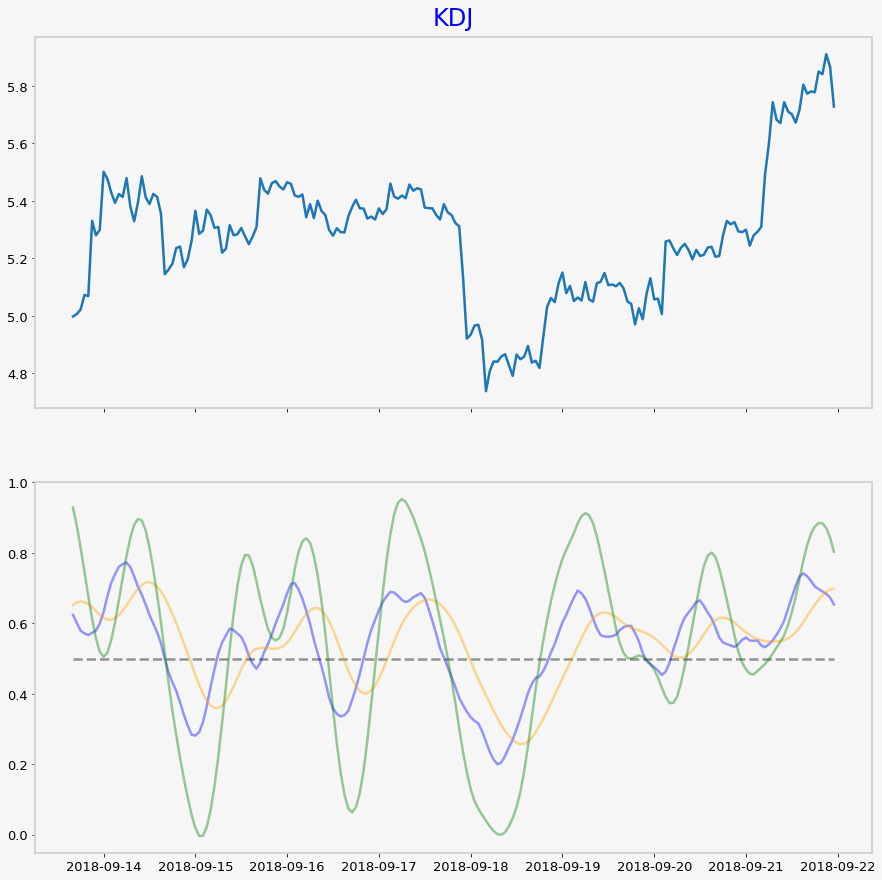

In [99]:
KDJ_K_A = dv1h.get_ts('KDJ_K_A', date_type='datetime')
KDJ_D_A = dv1h.get_ts('KDJ_D_A', date_type='datetime')
KDJ_J_A = dv1h.get_ts('KDJ_J_A', date_type='datetime')
RSV = dv1h.get_ts('RSV', date_type='datetime')

Plot_Mean(dv1h, KDJ_K_A.iloc[:,0], KDJ_D_A.iloc[:,0], KDJ_J_A.iloc[:,0], n=-200)

In [100]:
#进出场假设：

#由图像看出，KDJ与价格之间存在一定的相关性，10日均D由下向上穿过K时卖出，10日均D由上向下穿过K时买入

#10日均KDJ形成死叉，卖出信号

#10日均KDJ形成金叉，买入信号

In [101]:
# 进场信号
long = dv1h.add_formula("longKDJ","If(KDJ_K_A>KDJ_D_A && (Delay(KDJ_K_A<KDJ_D_A,1)),2,0)", add_data=True)
short = dv1h.add_formula("shortKDJ","If(KDJ_K_A<KDJ_D_A && (Delay(KDJ_K_A>KDJ_D_A,1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1h.add_formula("closeLongKDJ","If(shortKDJ==-2,1,0)", add_data=True)
close_short = dv1h.add_formula("closeShortKDJ","If(longKDJ==2,-1,0)", add_data=True)

In [102]:
#计算绩效
from jaqs_fxdayu.research import TimingDigger
Statistic = TimingDigger(output_folder=".", output_format='pdf',signal_name='Statistic')

def TimingSignal(td, dv, mhp=None,sl=None,sp=None):
    td.process_signal(
        enter_signal=dv.get_ts("longKDJ"),
        exit_signal=dv.get_ts("closeLongKDJ"),
        sig_type="long",  # 信号类型 long
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts("shortKDJ"),
        exit_signal=dv.get_ts("closeShortKDJ"),
        sig_type="short",  # 信号类型 short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )
TimingSignal(Statistic, dv1h, 100, 0.15, 0.7)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%


In [103]:
Statistic.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                       win     loss      all
t-stat              10.207  -11.077   -0.941
p-value              0.000    0.000    0.348
mean                 0.035   -0.032   -0.003
std                  0.033    0.032    0.046
info_ratio           1.076   -1.020   -0.065
skewness             2.369   -1.470    0.233
kurtosis             8.983    2.235    2.595
pct5                 0.003   -0.092   -0.083
pct25                0.011   -0.049   -0.026
pct50                0.028   -0.019   -0.003
pct75                0.050   -0.010    0.022
pct95                0.092   -0.001    0.066
occurance           91.000  119.000  210.000
win_ratio              NaN      NaN    0.433
win_mean/loss_mean     NaN      NaN    1.092


In [104]:
Statistic.create_event_report(sig_type="short")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               7.263  -8.053    0.073
p-value              0.000   0.000    0.942
mean                 0.040  -0.034    0.000
std                  0.038   0.032    0.051
info_ratio           1.048  -1.086    0.007
skewness             2.227  -0.976    0.559
kurtosis             7.088  -0.124    2.248
pct5                 0.003  -0.092   -0.091
pct25                0.012  -0.053   -0.026
pct50                0.031  -0.019   -0.002
pct75                0.057  -0.010    0.029
pct95                0.100  -0.002    0.074
occurance           49.000  56.000  105.000
win_ratio              NaN     NaN    0.467
win_mean/loss_mean     NaN     NaN    1.166


In [105]:
Statistic.create_event_report(sig_type="long")

*****-Summary-*****
Event Analysis
                       win    loss      all
t-stat               8.064  -7.594   -1.599
p-value              0.000   0.000    0.113
mean                 0.029  -0.030   -0.006
std                  0.023   0.031    0.041
info_ratio           1.259  -0.964   -0.157
skewness             1.404  -1.937   -0.552
kurtosis             2.323   4.686    2.097
pct5                 0.005  -0.083   -0.074
pct25                0.011  -0.041   -0.026
pct50                0.022  -0.019   -0.005
pct75                0.045  -0.010    0.017
pct95                0.066  -0.001    0.052
occurance           42.000  63.000  105.000
win_ratio              NaN     NaN    0.400
win_mean/loss_mean     NaN     NaN    0.972


In [106]:
#short和long_short胜率分别为0.467，0.433，均大于0.4；win_mean/loss_mean分别为1.166,1.092均大于1；
#long的胜率为0.400，但win_mean/loss_mean为0.972，低于1

In [2]:
#综合上述两组数据结果，胜率均大于等于0.4，除第二组数据的"long"外，其他各组win_mean/loss_mean均大于1，策略表现尚可